##  Developed by Jonathan Ojeda 21-06-2021 QAAFI UQ

#### _Collaborators:_ 

* Jose Jauregui GENTOS, Argentina
* German Berone INTA Balcarce, Argentina


In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from numpy import log as ln
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
from scipy import optimize
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from numpy  import array

#Extend screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Analysis of observed data from INTA network

In [13]:
inta= pd.read_csv(r'C:\Users\uqjojeda\Dropbox\Review alfalfa\JJO Edits\PythonWork\inta.csv')

In [14]:
inta

,prov,loc,env,lat,lon,rev,sow,dormancy,cultivar,year1,year2,year3,year4,average3,acumm12,acumm123,acumm1234,cob
0,LP,Anguil,Anguil-LP,36.31,64.01,8,1994,dormant,5683,1.45,3.21,7.88,9.26,4.18,4.66,12.54,21.80,70.10
1,LP,Anguil,Anguil-LP,36.31,64.01,8,1994,dormant,ABI700,1.58,3.22,8.60,9.85,4.47,4.80,13.40,23.25,58.70
2,LP,Anguil,Anguil-LP,36.31,64.01,8,1994,dormant,DIAMOND,1.59,2.86,6.77,8.27,3.74,4.45,11.22,19.49,46.60
3,LP,Anguil,Anguil-LP,36.31,64.01,8,1994,dormant,F161,1.85,3.39,7.15,9.21,4.13,5.24,12.39,21.60,64.50
4,LP,Anguil,Anguil-LP,36.31,64.01,8,1994,dormant,F686,2.03,2.91,7.75,9.08,4.23,4.94,12.69,21.77,43.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,SL,Villa Mercedes,Villa Mercedes-SL,33.40,65.28,26,2012,non dormant,EBC 90,17.07,13.78,2.83,NaN,11.23,30.85,33.68,NaN,52.80
3005,SL,Villa Mercedes,Villa Mercedes-SL,33.40,65.28,26,2012,non dormant,WL 818,16.29,14.33,2.98,NaN,11.20,30.62,33.60,NaN,81.00
3006,SL,Villa Mercedes,Villa Mercedes-SL,33.40,65.28,26,2012,non dormant,Neo Alfa,15.46,14.89,3.06,NaN,11.14,30.35,33.41,NaN,85.50
3007,SL,Villa Mercedes,Villa Mercedes-SL,33.40,65.28,26,2012,non dormant,RD 69,14.70,13.10,2.79,NaN,10.20,27.80,30.59,NaN,66.90


<AxesSubplot:ylabel='Frequency'>

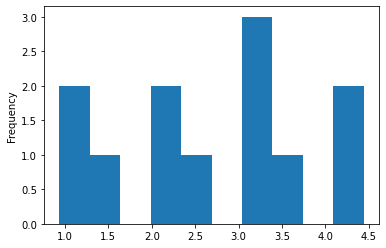

In [60]:
dormant = inta[inta['dormancy'] == 'dormant']
non_dormant = inta[inta['dormancy'] == 'non dormant']

q90 = non_dormant.groupby(['env'],as_index=False).quantile(0.90)
q75 = non_dormant.groupby(['env'],as_index=False).quantile(0.75)
sd = non_dormant.groupby(['env'],as_index=False).std()
mean = non_dormant.groupby(['env'],as_index=False).mean()
#rafaela = non_dormant[non_dormant['env'] == 'Rafaela-SF']
sd.average3.plot.hist()

In [65]:
q90.to_csv(r'C:\Users\uqjojeda\Dropbox\Review alfalfa\JJO Edits\PythonWork\q90.txt', index = False)
q75.to_csv(r'C:\Users\uqjojeda\Dropbox\Review alfalfa\JJO Edits\PythonWork\q75.txt', index = False)
mean.to_csv(r'C:\Users\uqjojeda\Dropbox\Review alfalfa\JJO Edits\PythonWork\mean.txt', index = False)
sd.to_csv(r'C:\Users\uqjojeda\Dropbox\Review alfalfa\JJO Edits\PythonWork\sd.txt', index = False)

In [126]:
data= pd.read_csv(r'C:\Users\uqjojeda\Dropbox\Review alfalfa\JJO Edits\PythonWork\dataEdited125.csv')

In [67]:
data.columns

Index(['prov', 'prov_abb', 'loc', 'env', 'period', 'irri', 'lon', 'lat',
       'lat2', 'rain', 'mean_obs_sd', 'sd_obs_sd', 'mean_obs_nd', 'sd_obs_nd',
       'mean_sim_rainfed', 'sd_sim_rainfed', 'mean_sim_irrigated',
       'sd_sim_irrigated', 'gap', 'dev', 'mean_sim', 'sd_sim'],
      dtype='object')

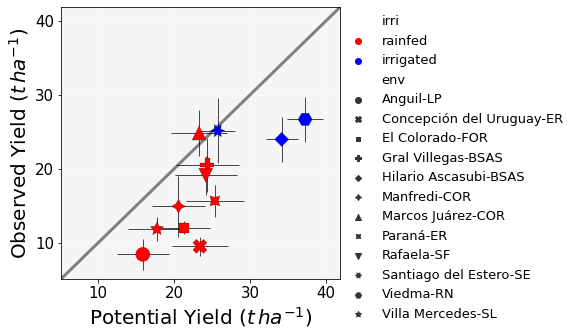

In [137]:
kwargs  =   {'edgecolor':"k"}
fig= plt.figure(figsize=(5,5))

ax=plt.subplot(1, 1, 1)
xmax=41.9
ymax=41.9
plt.plot([5.1,xmax],[5.1,ymax],"-",color="grey", linewidth=3,zorder=1)
ax.errorbar(data['mean_sim'], data['mean_obs_nd'], yerr = data['sd_obs_nd'], fmt ='o', marker='', zorder=2, color='k', linewidth=0.7)
ax.errorbar(data['mean_sim'], data['mean_obs_nd'], xerr = data['sd_sim'], fmt ='o', marker='', zorder=2, color='k', linewidth=0.7)
sns.scatterplot(x="mean_sim", y="mean_obs_nd",hue='irri', style='env', alpha=1, data=data, linewidth=0.2,**kwargs, s=200, zorder=3, palette=['red', 'blue'])

plt.legend(prop=dict(size=13),bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0., frameon=False)
plt.ylabel('Observed Yield ($t\,ha^{-1}$)', fontsize =20)
plt.xlabel('Potential Yield ($t\,ha^{-1}$)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.xaxis.set_tick_params(labelsize=15, rotation=0)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylim(5.1,ymax)
ax.set_xlim(5.1,xmax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.get_legend().remove()

#Taking data from dataframe to a list
Obs = pd.Series(data.mean_obs_nd.values)
y_o= Obs.tolist()
Pre = pd.Series(data.mean_sim.values)
y_p= Pre.tolist()

#Converting from a list to an arange
y_obs = array(y_o).round(decimals=2)
y_pre = array(y_p).round(decimals=2)

def rmse(y_obs, y_pre):
    """ Compute RMSE between two time series """
    return np.sqrt(np.mean(np.square(y_pre - y_obs))).round(decimals=2)

def ccc(y_true, y_pre):
    """ Compute the concordance correlation coefficient (CCC) between two
    1D time series """
    if y_true.ndim == 1:
        y_true = y_true.reshape(1, -1)
    if y_pre.ndim == 1:
        y_pre = y_pre.reshape(1, -1)
    cov_xy = np.mean(y_pre*y_true, axis=1) - \
        (np.mean(y_pre, axis=1) * np.mean(y_true, axis=1))
    mean_x = np.mean(y_pre, axis=1)
    mean_y = np.mean(y_true, axis=1)
    var_x = np.var(y_pre, axis=1)
    var_y = np.var(y_true, axis=1)
    return (2*cov_xy/(var_x + var_y + np.square(mean_x - mean_y)))[0].round(decimals=2)

RMSEb=rmse(y_obs, y_pre)
RMSE=str(RMSEb)

CCCb=ccc(y_obs, y_pre)
CCC=str(CCCb)

#plt.text(xmax*0.2, ymax*0.9,'RMSE='+RMSE+' $t\,ha^{-1}$',fontsize=13,color='k')
#plt.text(xmax*0.2, ymax*0.85,'CCC='+CCC, fontsize=13,color='k')
#plt.text(xmax*0.45, ymax*1.02,'RUE=1.15', fontsize=15,color='k')
#plt.savefig(r'C:\Users\uqjojeda\Dropbox\Review alfalfa\JJO Edits\PythonWork\Figures\rue125\xy.jpg', dpi=300, bbox_inches='tight', pad_inches=0)

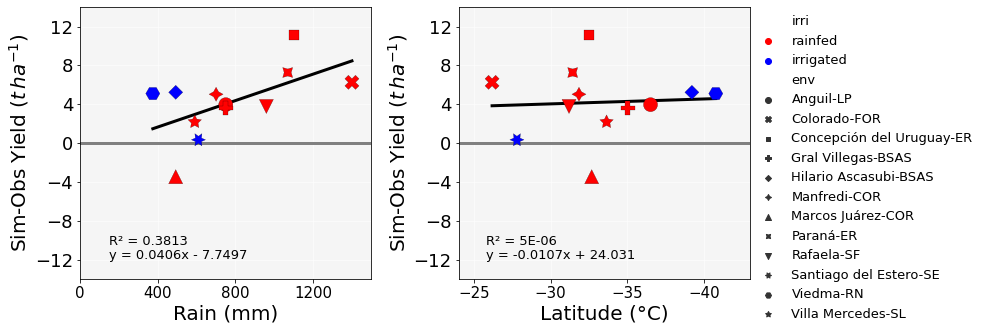

In [49]:
kwargs  =   {'edgecolor':"k"}
fig= plt.figure(figsize=(12,5))

ax=plt.subplot(1, 2, 1)
xmax=1500
xmin=0
ymax=14
ymin=-14

sns.scatterplot(x="rain", y="dev",hue='irri', style='env', alpha=1, data=data, linewidth=0.2,**kwargs, s=200, zorder=3, palette=['red', 'blue'])
sns.regplot(x="rain", y="dev", data=data, ci=None, color='k', scatter=False, line_kws={'linewidth':3, "zorder":2})
plt.axhline(y=0, color='grey', linestyle='-', linewidth=3,zorder=1)

plt.legend(prop=dict(size=13),bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0., frameon=False)
plt.ylabel('Sim-Obs Yield ($t\,ha^{-1}$)', fontsize =20)
plt.xlabel('Rain (mm)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.xaxis.set_tick_params(labelsize=15, rotation=0)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_ylim(ymin,ymax)
ax.set_xlim(xmin,xmax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(400))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(4))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.get_legend().remove()

plt.text(xmax*0.1, ymax*-0.85,'y = 0.0406x - 7.7497',fontsize=13,color='k')
plt.text(xmax*0.1, ymax*-0.75,'R² = 0.3813',fontsize=13,color='k')

ax=plt.subplot(1, 2, 2)
xmax=-43
xmin=-24
ymax=14
ymin=-14

sns.scatterplot(x="lat", y="dev",hue='irri', style='env', alpha=1, data=data, linewidth=0.2,**kwargs, s=200, zorder=3, palette=['red', 'blue'])
sns.regplot(x="lat", y="dev", data=data, ci=None, color='k', scatter=False, line_kws={'linewidth':3, "zorder":2})
plt.axhline(y=0, color='grey', linestyle='-', linewidth=3,zorder=1)

plt.legend(prop=dict(size=13),bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0., frameon=False)
plt.ylabel('Sim-Obs Yield ($t\,ha^{-1}$)', fontsize =20)
plt.xlabel('Latitude (°C)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.xaxis.set_tick_params(labelsize=15, rotation=0)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_ylim(ymin,ymax)
ax.set_xlim(xmin,xmax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(4))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.get_legend().remove()

plt.text(xmax*0.6, ymax*-0.85,'y = -0.0107x + 24.031',fontsize=13,color='k')
plt.text(xmax*0.6, ymax*-0.75,'R² = 5E-06',fontsize=13,color='k')

####################################################################
plt.subplots_adjust(wspace=0.3, hspace=0)
#plt.savefig(r'C:\Users\uqjojeda\Dropbox\Review alfalfa\JJO Edits\PythonWork\Figures\dev.jpg', dpi=300, bbox_inches='tight', pad_inches=0)

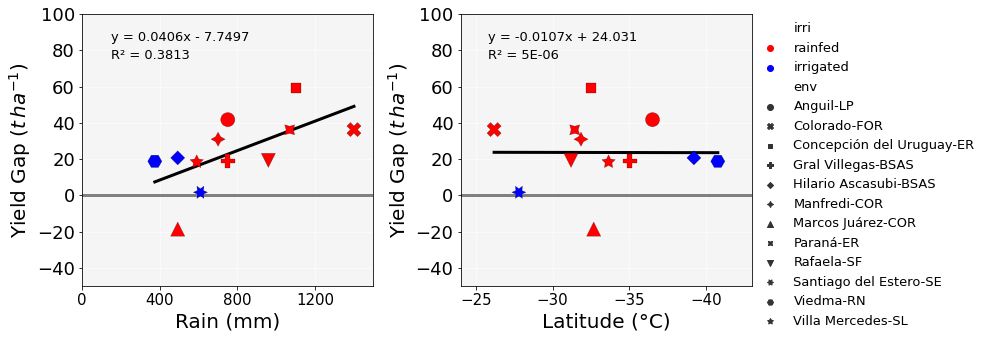

In [50]:
kwargs  =   {'edgecolor':"k"}
fig= plt.figure(figsize=(12,5))

ax=plt.subplot(1, 2, 1)
xmax=1500
xmin=0
ymax=100
ymin=-50

sns.scatterplot(x="rain", y="gap",hue='irri', style='env', alpha=1, data=data, linewidth=0.2,**kwargs, s=200, zorder=3, palette=['red', 'blue'])
sns.regplot(x="rain", y="gap", data=data, ci=None, color='k', scatter=False, line_kws={'linewidth':3, "zorder":2})
plt.axhline(y=0, color='grey', linestyle='-', linewidth=3,zorder=1)

plt.legend(prop=dict(size=13),bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0., frameon=False)
plt.ylabel('Yield Gap ($t\,ha^{-1}$)', fontsize =20)
plt.xlabel('Rain (mm)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.xaxis.set_tick_params(labelsize=15, rotation=0)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_ylim(ymin,ymax)
ax.set_xlim(xmin,xmax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(400))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.get_legend().remove()

plt.text(xmax*0.1, ymax*0.85,'y = 0.0406x - 7.7497',fontsize=13,color='k')
plt.text(xmax*0.1, ymax*0.75,'R² = 0.3813',fontsize=13,color='k')

ax=plt.subplot(1, 2, 2)
xmax=-43
xmin=-24
ymax=100
ymin=-50

sns.scatterplot(x="lat", y="gap",hue='irri', style='env', alpha=1, data=data, linewidth=0.2,**kwargs, s=200, zorder=3, palette=['red', 'blue'])
sns.regplot(x="lat", y="gap", data=data, ci=None, color='k', scatter=False, line_kws={'linewidth':3, "zorder":2})
plt.axhline(y=0, color='grey', linestyle='-', linewidth=3,zorder=1)

plt.legend(prop=dict(size=13),bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0., frameon=False)
plt.ylabel('Yield Gap ($t\,ha^{-1}$)', fontsize =20)
plt.xlabel('Latitude (°C)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.xaxis.set_tick_params(labelsize=15, rotation=0)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_ylim(ymin,ymax)
ax.set_xlim(xmin,xmax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.get_legend().remove()

plt.text(xmax*0.6, ymax*0.85,'y = -0.0107x + 24.031',fontsize=13,color='k')
plt.text(xmax*0.6, ymax*0.75,'R² = 5E-06',fontsize=13,color='k')

####################################################################
plt.subplots_adjust(wspace=0.3, hspace=0)

#plt.savefig(r'C:\Users\uqjojeda\Dropbox\Review alfalfa\JJO Edits\PythonWork\Figures\gap.jpg', dpi=300, bbox_inches='tight', pad_inches=0)

In [51]:
data.columns

Index(['prov', 'prov_abb', 'loc', 'env', 'period', 'irri', 'lon', 'lat',
       'lat2', 'rain', 'mean_obs_sd', 'sd_obs_sd', 'mean_obs_nd', 'sd_obs_nd',
       'mean_sim_rainfed', 'sd_sim_rainfed', 'mean_sim_irrigated',
       'sd_sim_irrigated', 'gap', 'dev', 'mean_sim', 'sd_sim'],
      dtype='object')

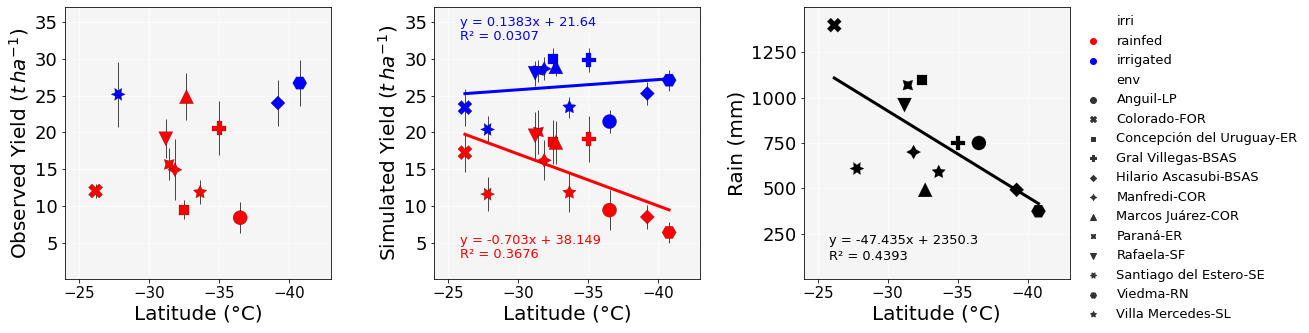

In [52]:
kwargs  =   {'edgecolor':"k"}
fig= plt.figure(figsize=(18,5))

###############################################
ax=plt.subplot(1, 3, 1)
xmax=-43
xmin=-24
ymax=37
ymin=0.1

ax.errorbar(data['lat'], data['mean_obs_nd'], yerr = data['sd_obs_nd'], fmt ='o', marker='', zorder=2, color='k', linewidth=0.7)
sns.scatterplot(x="lat", y="mean_obs_nd",hue='irri', style='env', alpha=1, data=data, linewidth=0.2,**kwargs, s=200, zorder=3, palette=['red', 'blue'])

plt.legend(prop=dict(size=13),bbox_to_anchor=(3.8, 0.99), loc=2, borderaxespad=0., frameon=False)
plt.ylabel('Observed Yield ($t\,ha^{-1}$)', fontsize =20)
plt.xlabel('Latitude (°C)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.xaxis.set_tick_params(labelsize=15, rotation=0)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_ylim(ymin,ymax)
ax.set_xlim(xmin,xmax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.get_legend().remove()

#############################################
ax=plt.subplot(1, 3, 2)
xmax=-43
xmin=-24
ymax=37
ymin=0.1

ax.errorbar(data['lat'], data['mean_sim_rainfed'], yerr = data['sd_sim_rainfed'], fmt ='o', marker='', zorder=2, color='k', linewidth=0.7)
sns.scatterplot(x="lat", y="mean_sim_rainfed", style='env', alpha=1, data=data, linewidth=0.2,**kwargs, s=200, zorder=3, color=['red'])
sns.regplot(x="lat", y="mean_sim_rainfed", data=data, ci=None, color='red', scatter=False, line_kws={'linewidth':3, "zorder":2})

ax.errorbar(data['lat'], data['mean_sim_irrigated'], yerr = data['sd_sim_irrigated'], fmt ='o', marker='', zorder=2, color='k', linewidth=0.7)
sns.scatterplot(x="lat", y="mean_sim_irrigated", style='env', alpha=1, data=data, linewidth=0.2,**kwargs, s=200, zorder=3, color=['blue'])
sns.regplot(x="lat", y="mean_sim_irrigated", data=data, ci=None, color='blue', scatter=False, line_kws={'linewidth':3, "zorder":2})

plt.legend(prop=dict(size=13),bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0., frameon=False, ncol=2)
plt.ylabel('Simulated Yield ($t\,ha^{-1}$)', fontsize =20)
plt.xlabel('Latitude (°C)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.xaxis.set_tick_params(labelsize=15, rotation=0)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_ylim(ymin,ymax)
ax.set_xlim(xmin,xmax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.get_legend().remove()

plt.text(xmax*0.6, ymax*0.93,'y = 0.1383x + 21.64',fontsize=13,color='blue')
plt.text(xmax*0.6, ymax*0.88,'R² = 0.0307',fontsize=13,color='blue')

plt.text(xmax*0.6, ymax*0.13,'y = -0.703x + 38.149',fontsize=13,color='red')
plt.text(xmax*0.6, ymax*0.08,'R² = 0.3676',fontsize=13,color='red')

#######################################
ax=plt.subplot(1, 3, 3)
xmax=-43
xmin=-24
ymax=1499
ymin=0.1

sns.scatterplot(x="lat", y="rain", style='env', alpha=1, data=data, linewidth=0.2,**kwargs, s=200, zorder=3, color=['k'])
sns.regplot(x="lat", y="rain", data=data, ci=None, color='k', scatter=False, line_kws={'linewidth':3, "zorder":2})

plt.legend(prop=dict(size=13),bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0., frameon=False, ncol=2)
plt.ylabel('Rain (mm)', fontsize =20)
plt.xlabel('Latitude (°C)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.xaxis.set_tick_params(labelsize=15, rotation=0)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_ylim(ymin,ymax)
ax.set_xlim(xmin,xmax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(250))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.get_legend().remove()

plt.text(xmax*0.6, ymax*0.13,'y = -47.435x + 2350.3',fontsize=13,color='k')
plt.text(xmax*0.6, ymax*0.07,'R² = 0.4393',fontsize=13,color='k')

####################################################################
plt.subplots_adjust(wspace=0.39, hspace=0)

#plt.savefig(r'C:\Users\uqjojeda\Dropbox\Review alfalfa\JJO Edits\PythonWork\Figures\lat.jpg', dpi=300, bbox_inches='tight', pad_inches=0)

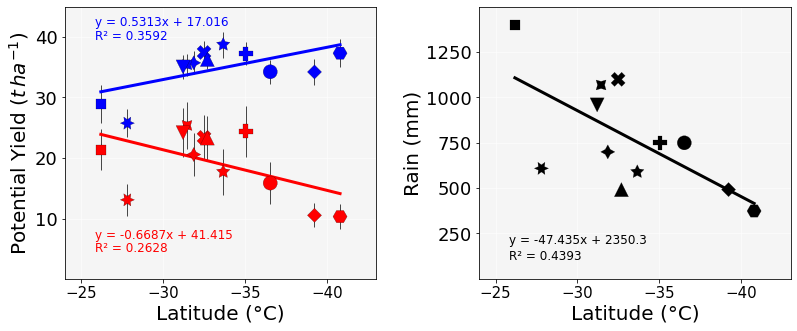

In [139]:
kwargs  =   {'edgecolor':"k"}
fig= plt.figure(figsize=(13,5))

#############################################
ax=plt.subplot(1, 2, 1)
xmax=-43
xmin=-24
ymax=44.9
ymin=0.1

ax.errorbar(data['lat'], data['mean_sim_rainfed'], yerr = data['sd_sim_rainfed'], fmt ='o', marker='', zorder=2, color='k', linewidth=0.7)
sns.scatterplot(x="lat", y="mean_sim_rainfed", style='env', alpha=1, data=data, linewidth=0.2,**kwargs, s=200, zorder=3, color=['red'])
sns.regplot(x="lat", y="mean_sim_rainfed", data=data, ci=None, color='red', scatter=False, line_kws={'linewidth':3, "zorder":2})

ax.errorbar(data['lat'], data['mean_sim_irrigated'], yerr = data['sd_sim_irrigated'], fmt ='o', marker='', zorder=2, color='k', linewidth=0.7)
sns.scatterplot(x="lat", y="mean_sim_irrigated", style='env', alpha=1, data=data, linewidth=0.2,**kwargs, s=200, zorder=3, color=['blue'])
sns.regplot(x="lat", y="mean_sim_irrigated", data=data, ci=None, color='blue', scatter=False, line_kws={'linewidth':3, "zorder":2})

plt.legend(prop=dict(size=13),bbox_to_anchor=(2.5, 0.99), loc=2, borderaxespad=0., frameon=False, ncol=2)
plt.ylabel('Potential Yield ($t\,ha^{-1}$)', fontsize =20)
plt.xlabel('Latitude (°C)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.xaxis.set_tick_params(labelsize=15, rotation=0)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_ylim(ymin,ymax)
ax.set_xlim(xmin,xmax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.get_legend().remove()

plt.text(xmax*0.6, ymax*0.93,'y = 0.5313x + 17.016',fontsize=12,color='blue')
plt.text(xmax*0.6, ymax*0.88,'R² = 0.3592',fontsize=12,color='blue')

plt.text(xmax*0.6, ymax*0.15,'y = -0.6687x + 41.415',fontsize=12,color='red')
plt.text(xmax*0.6, ymax*0.10,'R² = 0.2628',fontsize=12,color='red')

#######################################
ax=plt.subplot(1, 2, 2)
xmax=-43
xmin=-24
ymax=1499
ymin=0.1

sns.scatterplot(x="lat", y="rain", style='env', alpha=1, data=data, linewidth=0.2,**kwargs, s=200, zorder=3, color=['k'])
sns.regplot(x="lat", y="rain", data=data, ci=None, color='k', scatter=False, line_kws={'linewidth':3, "zorder":2})

plt.legend(prop=dict(size=13),bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0., frameon=False, ncol=2)
plt.ylabel('Rain (mm)', fontsize =20)
plt.xlabel('Latitude (°C)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.xaxis.set_tick_params(labelsize=15, rotation=0)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_ylim(ymin,ymax)
ax.set_xlim(xmin,xmax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(250))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.get_legend().remove()

plt.text(xmax*0.6, ymax*0.13,'y = -47.435x + 2350.3',fontsize=12,color='k')
plt.text(xmax*0.6, ymax*0.07,'R² = 0.4393',fontsize=12,color='k')
#plt.text(xmax*0.13, ymax*1.02,'RUE=1.25', fontsize=15,color='k')
####################################################################
plt.subplots_adjust(wspace=0.33, hspace=0)

#plt.savefig(r'C:\Users\uqjojeda\Dropbox\Review alfalfa\JJO Edits\PythonWork\Figures\rue125\lat.jpg', dpi=300, bbox_inches='tight', pad_inches=0)

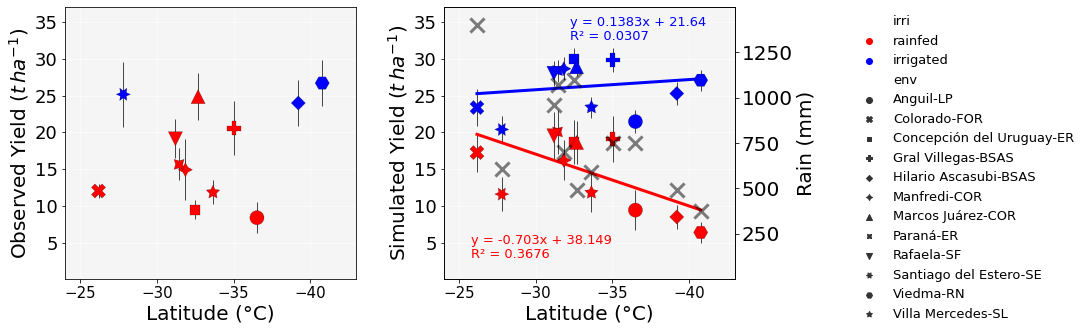

In [53]:
kwargs  =   {'edgecolor':"k"}
fig= plt.figure(figsize=(12,5))

###############################################
ax=plt.subplot(1, 2, 1)
xmax=-43
xmin=-24
ymax=37
ymin=0.1

ax.errorbar(data['lat'], data['mean_obs_nd'], yerr = data['sd_obs_nd'], fmt ='o', marker='', zorder=2, color='k', linewidth=0.7)
sns.scatterplot(x="lat", y="mean_obs_nd",hue='irri', style='env', alpha=1, data=data, linewidth=0.2,**kwargs, s=200, zorder=3, palette=['red', 'blue'])

plt.legend(prop=dict(size=13),bbox_to_anchor=(2.7, 0.99), loc=2, borderaxespad=0., frameon=False)
plt.ylabel('Observed Yield ($t\,ha^{-1}$)', fontsize =20)
plt.xlabel('Latitude (°C)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.xaxis.set_tick_params(labelsize=15, rotation=0)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_ylim(ymin,ymax)
ax.set_xlim(xmin,xmax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
#ax.get_legend().remove()

#############################################
ax=plt.subplot(1, 2, 2)
xmax=-43
xmin=-24
ymax=37
ymin=0.1

ax.errorbar(data['lat'], data['mean_sim_rainfed'], yerr = data['sd_sim_rainfed'], fmt ='o', marker='', zorder=2, color='k', linewidth=0.7)
sns.scatterplot(x="lat", y="mean_sim_rainfed", style='env', alpha=1, data=data, linewidth=0.2,**kwargs, s=200, zorder=3, color=['red'])
sns.regplot(x="lat", y="mean_sim_rainfed", data=data, ci=None, color='red', scatter=False, line_kws={'linewidth':3, "zorder":2})

ax.errorbar(data['lat'], data['mean_sim_irrigated'], yerr = data['sd_sim_irrigated'], fmt ='o', marker='', zorder=2, color='k', linewidth=0.7)
sns.scatterplot(x="lat", y="mean_sim_irrigated", style='env', alpha=1, data=data, linewidth=0.2,**kwargs, s=200, zorder=3, color=['blue'])
sns.regplot(x="lat", y="mean_sim_irrigated", data=data, ci=None, color='blue', scatter=False, line_kws={'linewidth':3, "zorder":2})

plt.legend(prop=dict(size=13),bbox_to_anchor=(1, 0.99), loc=2, borderaxespad=0., frameon=False, ncol=2)
plt.ylabel('Simulated Yield ($t\,ha^{-1}$)', fontsize =20)
plt.xlabel('Latitude (°C)', fontsize =20)
ax = plt.gca()
ax.grid(True, 'major', color='w', linestyle='-', linewidth=0.5)
ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
ax.patch.set_facecolor('0.96')
ax.set_axisbelow(True)
ax.xaxis.set_tick_params(labelsize=15, rotation=0)
ax.yaxis.set_tick_params(labelsize=18)
ax.set_ylim(ymin,ymax)
ax.set_xlim(xmin,xmax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
ax.get_legend().remove()

plt.text(xmax*0.75, ymax*0.93,'y = 0.1383x + 21.64',fontsize=13,color='blue')
plt.text(xmax*0.75, ymax*0.88,'R² = 0.0307',fontsize=13,color='blue')

plt.text(xmax*0.6, ymax*0.13,'y = -0.703x + 38.149',fontsize=13,color='red')
plt.text(xmax*0.6, ymax*0.08,'R² = 0.3676',fontsize=13,color='red')

ax2 = plt.twinx()
plt.scatter(data.lat, data.rain, color="k", marker="x", linewidth=3, edgecolor='black', s=200, alpha = 0.5)
plt.ylabel('Rain (mm)', fontsize =20)
ax2.yaxis.set_tick_params(labelsize=20)
ax2.set_ylim(0.01,1499)

####################################################################
plt.subplots_adjust(wspace=0.3, hspace=0)

#plt.savefig(r'C:\Users\uqjojeda\Dropbox\Review alfalfa\JJO Edits\PythonWork\Figures\latv2.jpg', dpi=300, bbox_inches='tight', pad_inches=0)